In [30]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
louisville_zip_map = gpd.read_file('Jefferson_County_KY_ZIP_Codes.shp')
# louisville_zip_map['ZIPCODE_length'] = louisville_zip_map['ZIPCODE'].astype(str).str.len()
louisville_zip_map.sort_values(by='ZIPCODE')
louisville_zip_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   42 non-null     int64   
 1   ZIPCODE    42 non-null     object  
 2   SHAPEAREA  42 non-null     float64 
 3   SHAPELEN   42 non-null     float64 
 4   geometry   42 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 1.8+ KB


###### How to use boxed text annotation <br> https://matplotlib.org/stable/tutorials/text/annotations.html#annotating-with-boxed-text
###### How to reduce the whitespace between map and legend: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html & https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar

C:\Users\Mary's PC\AppData\Local\Temp\ipykernel_8096\3995637392.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map.ZIPCODE):


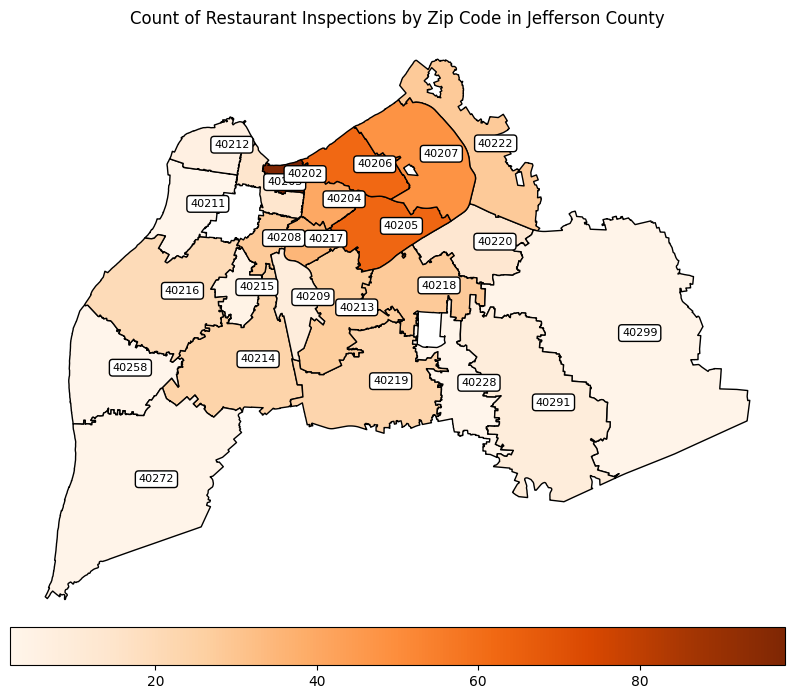

In [96]:
path = os.path.join('..','merged_output_masked.xlsx')
restaurants_df = pd.read_excel(path)
restaurants_df = restaurants_df['zip'].value_counts().reset_index().rename(columns={'zip':'ZIPCODE'}).astype(str).sort_values(by='ZIPCODE')
# restaurants_df['ZIPCODE_length'] = restaurants_df['ZIPCODE'].astype(str).str.len()
restaurants_df['count']=restaurants_df['count'].astype(int)
# restaurants_df.info()

merged_map = louisville_zip_map.merge(restaurants_df,on='ZIPCODE')
# merged_map.info()
fig, ax = plt.subplots(figsize=(10, 10))


merged_map.plot(column='count', cmap='Oranges', ax=ax, edgecolor='black', legend=True, legend_kwds={'location': 'bottom', "pad": 0}).axis('off')

for x, y, label in zip(merged_map.geometry.centroid.x, merged_map.geometry.centroid.y, merged_map.ZIPCODE):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points",fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))


plt.title("Count of Restaurant Inspections by Zip Code in Jefferson County")
plt.show()

In [ ]:
print(louisville_zip_map['ZIPCODE'].dtypes)
print(restaurants_df['ZIPCODE'].dtypes)

print(louisville_zip_map.columns)
print(restaurants_df.columns)